In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [16]:
file_path = 'crime_dataset_india.csv'
crime_data = pd.read_csv(file_path)

  # Preprocessing: Filter data for a specific city and aggregate by date

In [17]:
crime_data['Date Reported'] = pd.to_datetime(crime_data['Date Reported'], format='%d-%m-%Y %H:%M')
city_data = crime_data[crime_data['City'] == 'Hyderabad']
city_data_daily = city_data.groupby(city_data['Date Reported'].dt.date).size()

# Convert to time series format

In [18]:
time_series = pd.Series(city_data_daily, index=pd.to_datetime(city_data_daily.index))

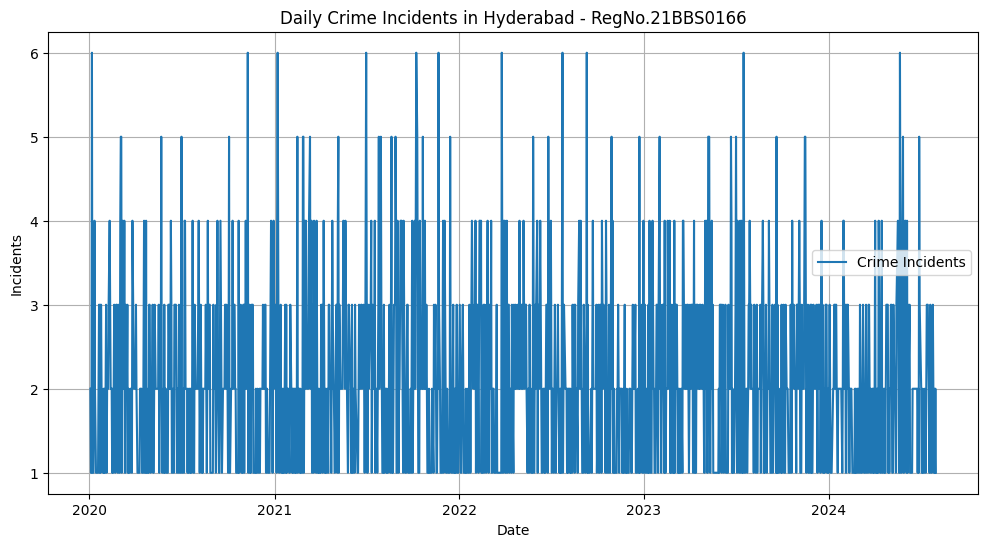

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Crime Incidents')
plt.title('Daily Crime Incidents in Hyderabad - RegNo.21BBS0166')
plt.xlabel('Date')
plt.ylabel('Incidents')
plt.legend()
plt.grid(True)
plt.show()

# Check stationarity and apply differencing if necessary

In [20]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(time_series)
print("ADF Statistic: ", adf_test[0])
print("p-value: ", adf_test[1])

ADF Statistic:  -21.026604841203056
p-value:  0.0


# Apply differencing if the data is not stationary

In [21]:
if adf_test[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

# Determine ARIMA parameters

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

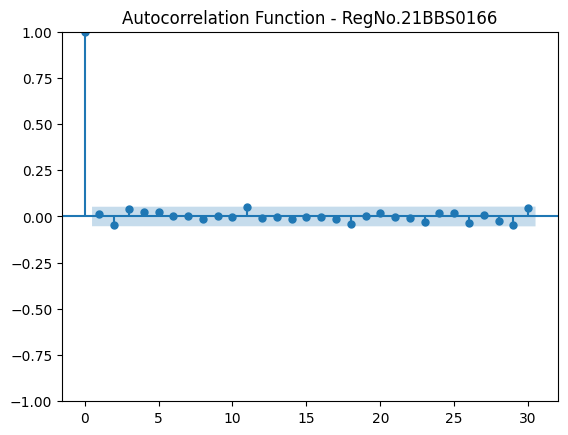

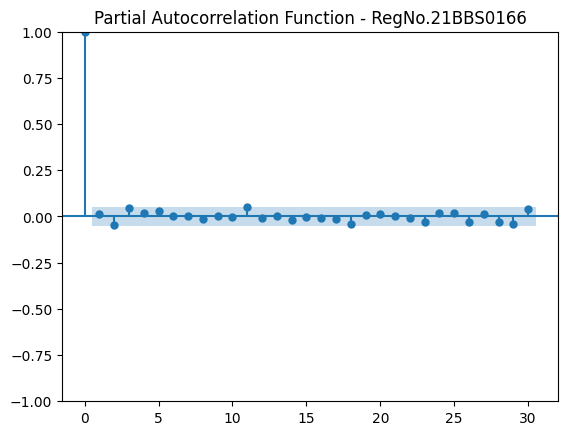

In [23]:
plot_acf(time_series_diff, lags=30)
plt.title('Autocorrelation Function - RegNo.21BBS0166')
plt.show()

plot_pacf(time_series_diff, lags=30)
plt.title('Partial Autocorrelation Function - RegNo.21BBS0166')
plt.show()

# Fit ARIMA Model

In [24]:
p, d, q = 1, 1, 1  # Example values, can be tuned based on PACF/ACF results
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1383
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2069.715
Date:                Sun, 17 Nov 2024   AIC                           4145.429
Time:                        15:05:42   BIC                           4161.123
Sample:                             0   HQIC                          4151.300
                               - 1383                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0129      0.025      0.512      0.608      -0.036       0.062
ma.L1         -0.9985      0.005   -217.914      0.000      -1.008      -0.990
sigma2         1.1655      0.038     30.706      0.0

In [26]:
forecast = results.forecast(steps=10)
print("Crime Incident Forecast - RegNo.21BBS0166:")
print(forecast)

Crime Incident Forecast - RegNo.21BBS0166:
1383    2.049084
1384    2.062616
1385    2.062790
1386    2.062792
1387    2.062792
1388    2.062792
1389    2.062792
1390    2.062792
1391    2.062792
1392    2.062792
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


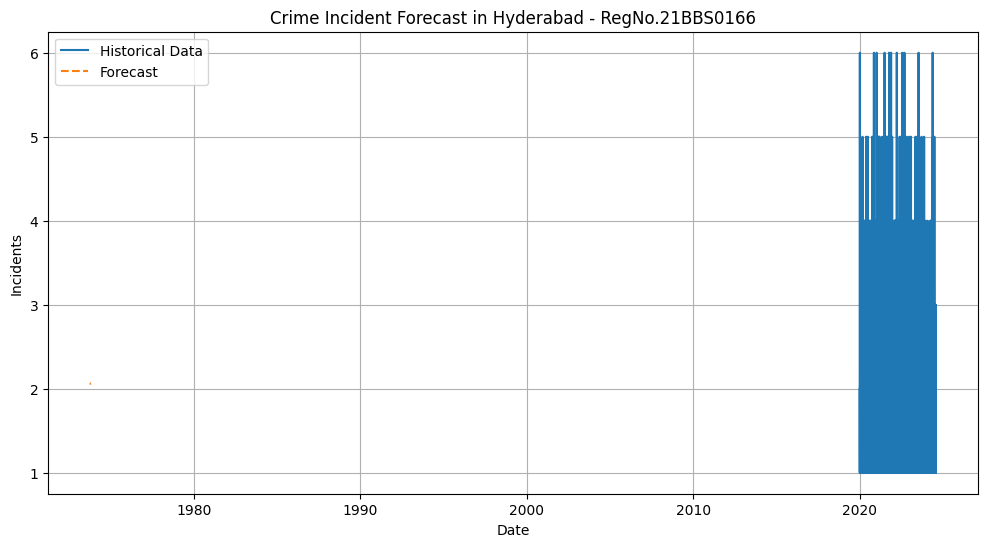

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Historical Data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Crime Incident Forecast in Hyderabad - RegNo.21BBS0166')
plt.xlabel('Date')
plt.ylabel('Incidents')
plt.legend()
plt.grid(True)
plt.show()